In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Paired')

In [61]:
#The following functions are for breaking up larger regions into subregions and graphing the data of each one.

def assign_regions(df, list_of_lists):
    for index in df.index:
        for region in list_of_lists:
            for country in region:
                if df.at[index,'Country'] == country:
                    df.at[index,'Region'] = region[-1]
    return(df)
    
def graph_regions(df,region):
    g = sns.relplot(data = df, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Region', ci = None)
    g.fig.suptitle('Change in BMI for '+region)
    #I want this one to have a different palette for each column, but haven't figured it out yet.
    #sns.relplot(data = df, kind = 'line',
    #           x = 'Year', y = 'BMI', hue = 'Country', col = 'Region', ci = None)
    
    h = sns.catplot(data = df.mask(df['Sex'] == 'Both sexes').dropna(), kind = 'swarm', 
                    x = 'Sex', y = 'BMI',
                    hue = 'Year', ci = None, legend = None, palette = 'Blues')
    h.fig.suptitle('Distribution of BMI by Gender for '+region)
    sns.catplot(data = df.mask(df['Sex'] == 'Both sexes').dropna(), kind = 'swarm',
                    x = 'Sex', y = 'BMI',
                    hue = 'Year', col = 'Region', ci = None, legend = None, palette = 'Reds')



In [52]:
data_clean = pd.read_csv('data_clean.csv')

#data_clean['Continent'] = data_clean['Region']
asia = ['South Asia', 'Middle East', 'Southeast Asia', 'East Asia', 'Central Asia']
europe = ['Balkans', 'Eastern Europe', 'Southern Europe', 'Western Europe', 'Northern Europe']
africa = ['North Africa', 'Southern Africa', 'West Africa', 'East Africa', 'Central Africa']
north_america = ['Caribbean', 'Central America', 'North America']
south_america = ['South America']
oceania = ['Oceania']

#del index
multi_index = pd.MultiIndex.from_frame(data_clean[['Continent','Country','Region']])
data_clean = data_clean.set_index(multi_index)

data_clean = data_clean.drop(columns = ['Continent', 'Region'])
print(data_clean.head())

                                      Country         Sex  Year  \
Continent Country     Region                                      
Asia      Afghanistan South Asia  Afghanistan  Both sexes  1975   
                      South Asia  Afghanistan        Male  1975   
                      South Asia  Afghanistan      Female  1975   
                      South Asia  Afghanistan  Both sexes  1976   
                      South Asia  Afghanistan        Male  1976   

                                    Obesity (%)  BMI  
Continent Country     Region                          
Asia      Afghanistan South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.6]  0.2  
                      South Asia  0.8 [0.2-2.0]  0.8  
                      South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.7]  0.2  


# Asia

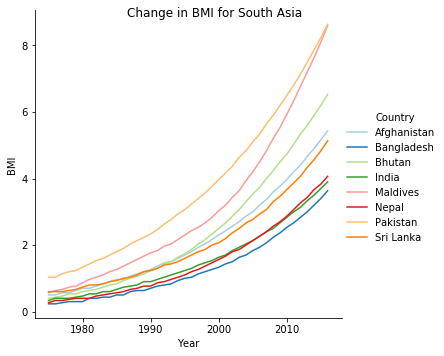

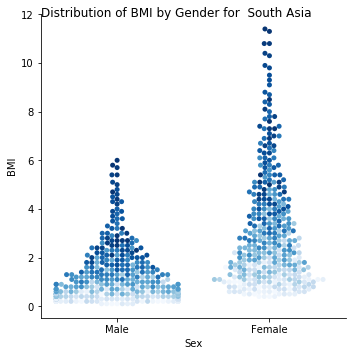

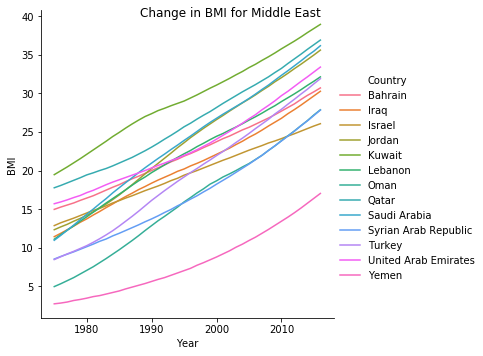

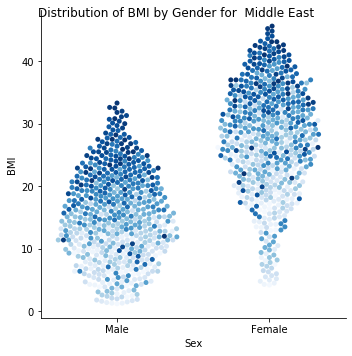

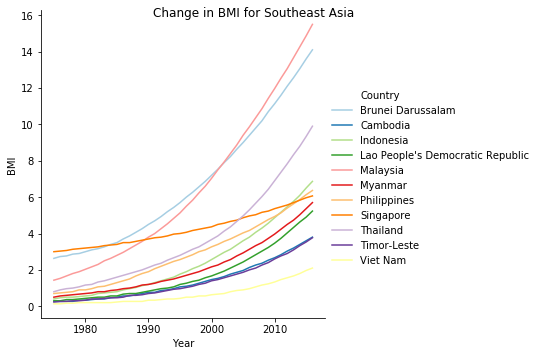

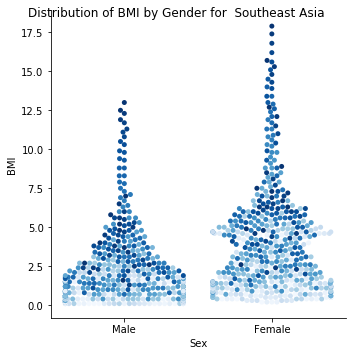

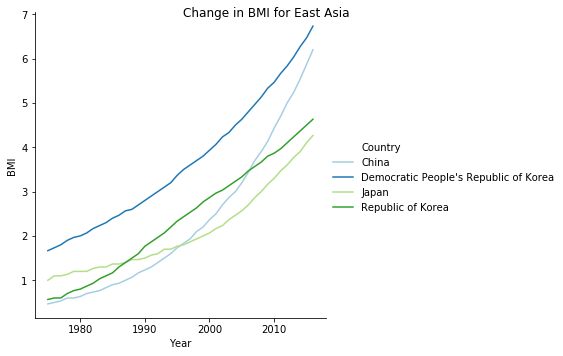

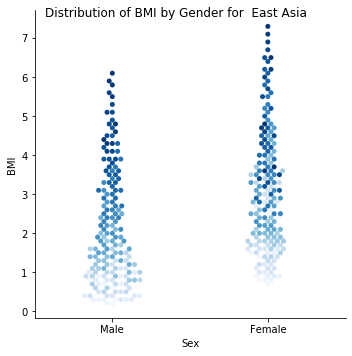

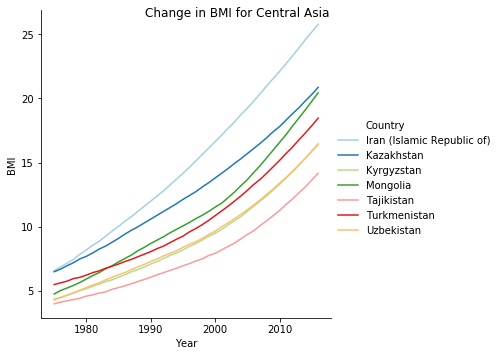

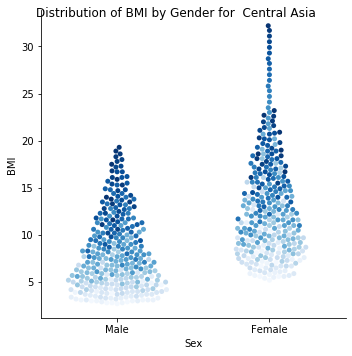

In [53]:
for region in asia:
    df_region = data_clean.xs(['Asia', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# Oceania

The graphs below help visualize the obesity data for Oceania, which is a region of the world known for it's high rates of obesity. The line plot breaks it up into subregions and tracks the change in BMI for each one. The first swarm plot compare the BMI's of each gender across the entire region. The smaller swarm plots show how each subregion contributes to the total result. The points of the swarm plots get darker according to the year.

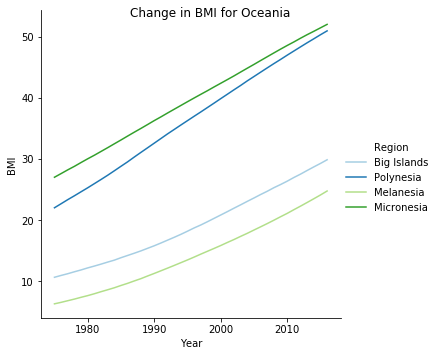

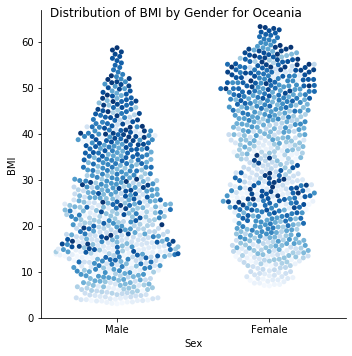

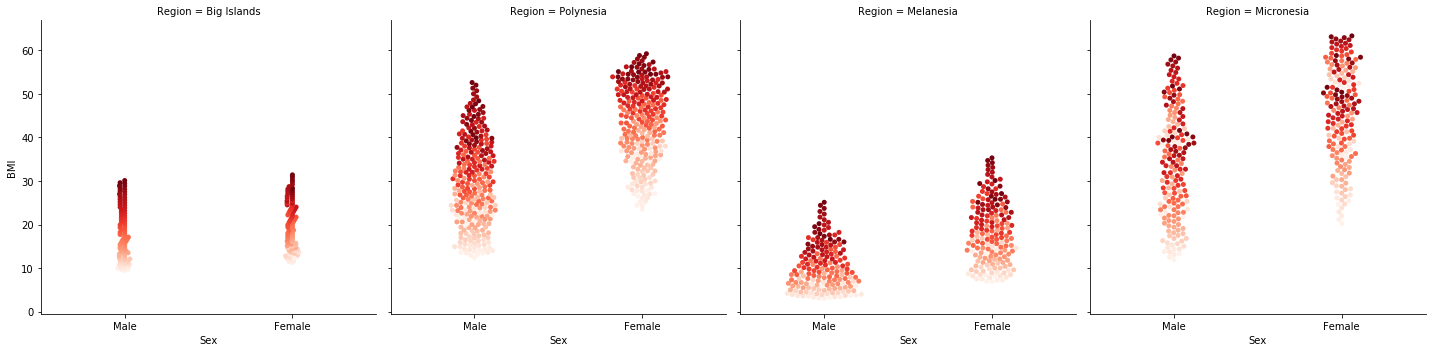

In [63]:
oceania = data_clean.xs('Oceania', level = 2).drop('Country', axis = 1).reset_index()
melanesia = ['Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu','Melanesia']
micronesia = ['Micronesia (Federated States of)', 'Kiribati', 'Nauru', 'Palau', 'Micronesia']
polynesia = ['Cook Islands', 'Marshall Islands', 'Niue', 'Samoa', 'Tonga', 'Tuvalu', 'Polynesia']
big_islands = ['Australia', 'New Zealand', 'Big Islands']
list_of_lists = [melanesia, micronesia, polynesia, big_islands]

oceania = assign_regions(oceania, list_of_lists)
graph_regions(oceania,'Oceania')
del oceania

# Europe

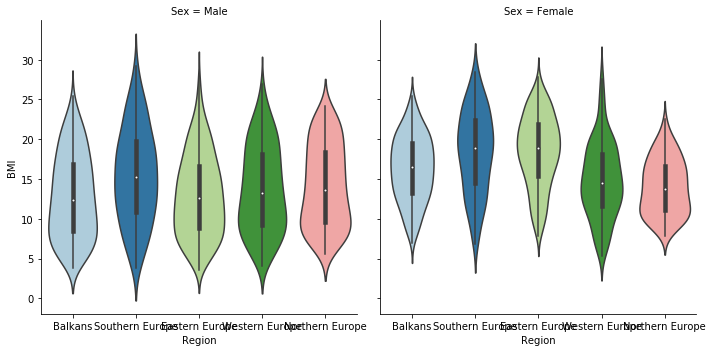

In [95]:
europe = data_clean.xs('Europe', level = 0).drop('Country', axis = 1).reset_index()
europe = europe.mask(europe['Country'] == 'Monaco').mask(europe['Country'] == 'San Marino').mask(europe['Sex'] == 'Both sexes').dropna()
sns.catplot(data = europe, kind = 'violin',
           x = 'Region', y = 'BMI', ci = None, col = 'Sex')

Text(0.5, 1.03, 'Distribution of BMI by Country for the Balkans: 1975-2016')

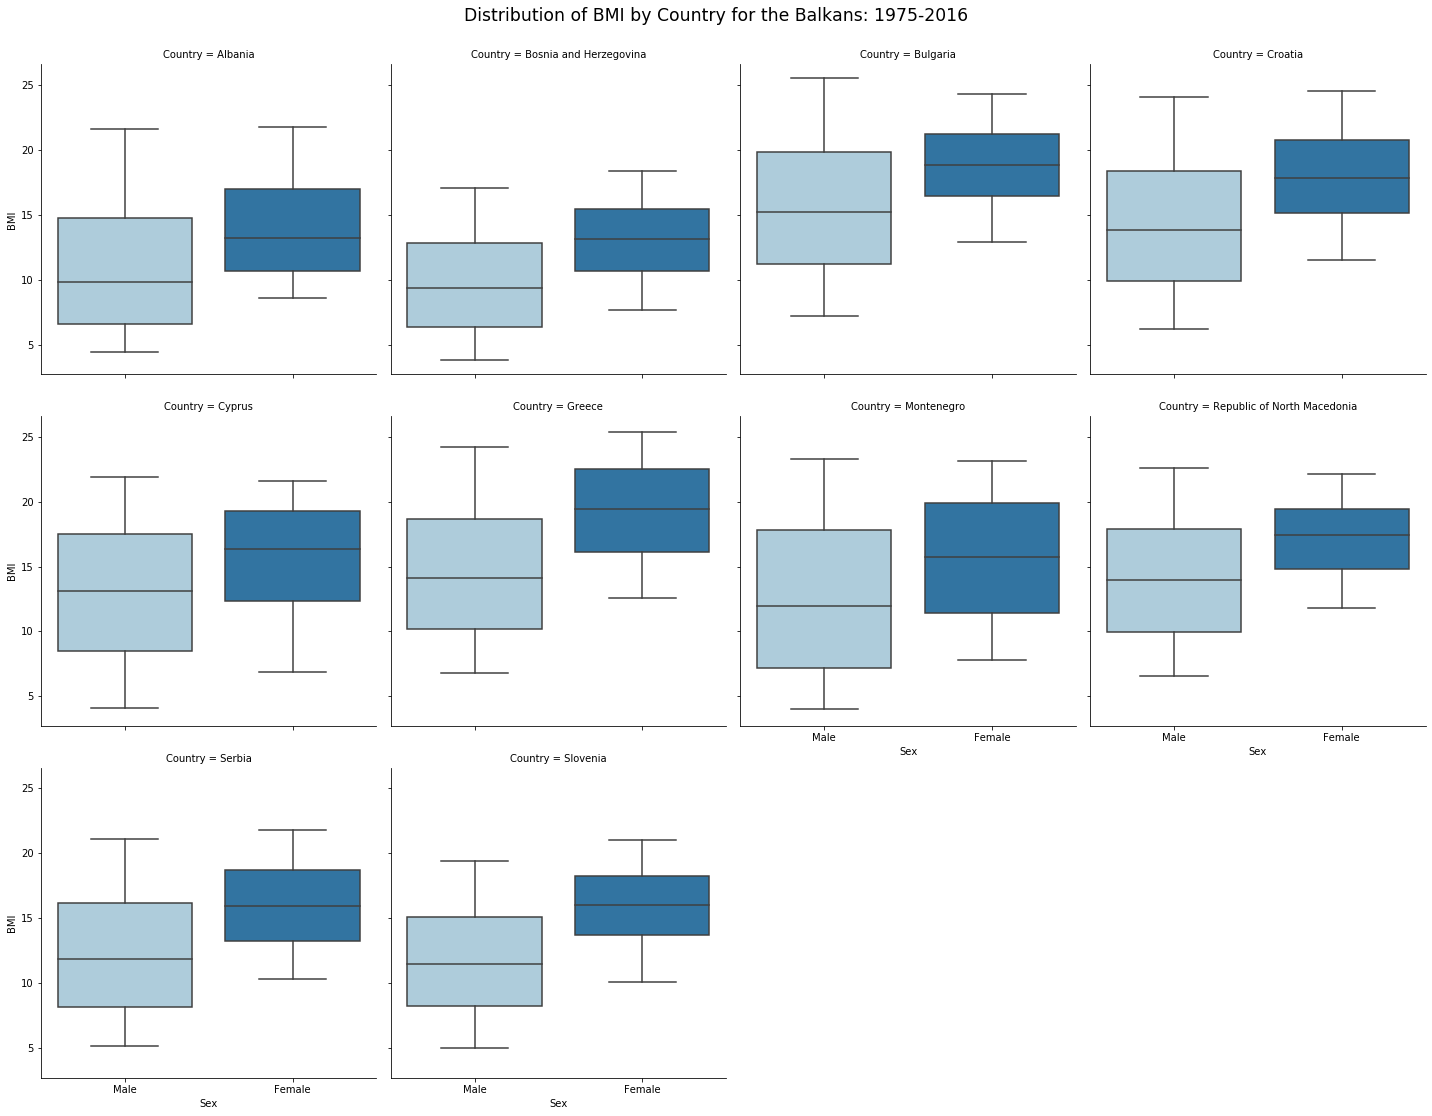

In [123]:
g = sns.catplot(data = europe[europe['Region'] == 'Balkans'], kind = 'box',
           x = 'Sex', y = 'BMI',
            col = 'Country', col_wrap = 4, ci = None)
g.fig.suptitle('Distribution of BMI by Country for the Balkans: 1975-2016', y = 1.03, fontsize = 'xx-large')